In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Classification metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
# Models
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingRegressor
from sklearn.svm import SVC
try:
    from xgboost import XGBRegressor, XGBClassifier
except Exception:
    XGBRegressor = XGBClassifier = None

try:
    from catboost import CatBoostRegressor, CatBoostClassifier
except Exception:
    CatBoostRegressor = CatBoostClassifier = None

import mlflow
import mlflow.sklearn

In [2]:
data = pd.read_csv("india_housing_prices.csv")
data

,ID,State,City,Locality,Property_Type,BHK,Size_in_SqFt,Price_in_Lakhs,Price_per_SqFt,Year_Built,...,Age_of_Property,Nearby_Schools,Nearby_Hospitals,Public_Transport_Accessibility,Parking_Space,Security,Amenities,Facing,Owner_Type,Availability_Status
0,1,Tamil Nadu,Chennai,Locality_84,Apartment,1,4740,489.76,0.10,1990,...,35,10,3,High,No,No,"Playground, Gym, Garden, Pool, Clubhouse",West,Owner,Ready_to_Move
1,2,Maharashtra,Pune,Locality_490,Independent House,3,2364,195.52,0.08,2008,...,17,8,1,Low,No,Yes,"Playground, Clubhouse, Pool, Gym, Garden",North,Builder,Under_Construction
2,3,Punjab,Ludhiana,Locality_167,Apartment,2,3642,183.79,0.05,1997,...,28,9,8,Low,Yes,No,"Clubhouse, Pool, Playground, Gym",South,Broker,Ready_to_Move
3,4,Rajasthan,Jodhpur,Locality_393,Independent House,2,2741,300.29,0.11,1991,...,34,5,7,High,Yes,Yes,"Playground, Clubhouse, Gym, Pool, Garden",North,Builder,Ready_to_Move
4,5,Rajasthan,Jaipur,Locality_466,Villa,4,4823,182.90,0.04,2002,...,23,4,9,Low,No,Yes,"Playground, Garden, Gym, Pool, Clubhouse",East,Builder,Ready_to_Move
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,249996,Gujarat,Ahmedabad,Locality_187,Independent House,5,1995,274.75,0.14,1995,...,30,8,6,Low,No,No,"Playground, Garden, Gym, Clubhouse, Pool",East,Broker,Under_Construction
249996,249997,Tamil Nadu,Chennai,Locality_348,Apartment,1,2293,13.40,0.01,2013,...,12,8,10,Low,No,No,Playground,South,Broker,Ready_to_Move
249997,249998,Telangana,Warangal,Locality_225,Villa,4,2910,236.94,0.08,2003,...,22,10,4,High,Yes,Yes,Playground,South,Builder,Under_Construction
249998,249999,Odisha,Cuttack,Locality_138,Villa,1,1149,141.66,0.12,2007,...,18,3,7,Low,Yes,Yes,"Playground, Gym, Pool",South,Owner,Ready_to_Move


In [3]:
data.columns

Index(['ID', 'State', 'City', 'Locality', 'Property_Type', 'BHK',
       'Size_in_SqFt', 'Price_in_Lakhs', 'Price_per_SqFt', 'Year_Built',
       'Furnished_Status', 'Floor_No', 'Total_Floors', 'Age_of_Property',
       'Nearby_Schools', 'Nearby_Hospitals', 'Public_Transport_Accessibility',
       'Parking_Space', 'Security', 'Amenities', 'Facing', 'Owner_Type',
       'Availability_Status'],
      dtype='object')

In [4]:
data.isnull().sum()

ID                                0
State                             0
City                              0
Locality                          0
Property_Type                     0
BHK                               0
Size_in_SqFt                      0
Price_in_Lakhs                    0
Price_per_SqFt                    0
Year_Built                        0
Furnished_Status                  0
Floor_No                          0
Total_Floors                      0
Age_of_Property                   0
Nearby_Schools                    0
Nearby_Hospitals                  0
Public_Transport_Accessibility    0
Parking_Space                     0
Security                          0
Amenities                         0
Facing                            0
Owner_Type                        0
Availability_Status               0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 23 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   ID                              250000 non-null  int64  
 1   State                           250000 non-null  object 
 2   City                            250000 non-null  object 
 3   Locality                        250000 non-null  object 
 4   Property_Type                   250000 non-null  object 
 5   BHK                             250000 non-null  int64  
 6   Size_in_SqFt                    250000 non-null  int64  
 7   Price_in_Lakhs                  250000 non-null  float64
 8   Price_per_SqFt                  250000 non-null  float64
 9   Year_Built                      250000 non-null  int64  
 10  Furnished_Status                250000 non-null  object 
 11  Floor_No                        250000 non-null  int64  
 12  Total_Floors    

In [6]:
#EDA

In [37]:
data.head()

,ID,State,City,Locality,Property_Type,BHK,Size_in_SqFt,Price_in_Lakhs,Price_per_SqFt,Year_Built,...,Parking_Space,Security,Amenities,Facing,Owner_Type,Availability_Status,Amenity_Count,growth_rate_city,Future_Price_5Y,Good_Investment
0,1,Tamil Nadu,Chennai,Locality_84,Apartment,1,4740,489.76,0.10,1990,...,No,No,"Playground, Gym, Garden, Pool, Clubhouse",West,Owner,Ready_to_Move,5,0.08,719.618119,0
1,2,Maharashtra,Pune,Locality_490,Independent House,3,2364,195.52,0.08,2008,...,No,Yes,"Playground, Clubhouse, Pool, Gym, Garden",North,Builder,Under_Construction,5,0.09,300.831756,1
2,3,Punjab,Ludhiana,Locality_167,Apartment,2,3642,183.79,0.05,1997,...,Yes,No,"Clubhouse, Pool, Playground, Gym",South,Broker,Ready_to_Move,4,0.08,270.047807,1
3,4,Rajasthan,Jodhpur,Locality_393,Independent House,2,2741,300.29,0.11,1991,...,Yes,Yes,"Playground, Clubhouse, Gym, Pool, Garden",North,Builder,Ready_to_Move,5,0.08,441.224528,1
4,5,Rajasthan,Jaipur,Locality_466,Villa,4,4823,182.90,0.04,2002,...,No,Yes,"Playground, Garden, Gym, Pool, Clubhouse",East,Builder,Ready_to_Move,5,0.08,268.740105,1


count    250000.000000
mean        254.586854
std         141.349921
min          10.000000
25%         132.550000
50%         253.870000
75%         376.880000
max         500.000000
Name: Price_in_Lakhs, dtype: float64


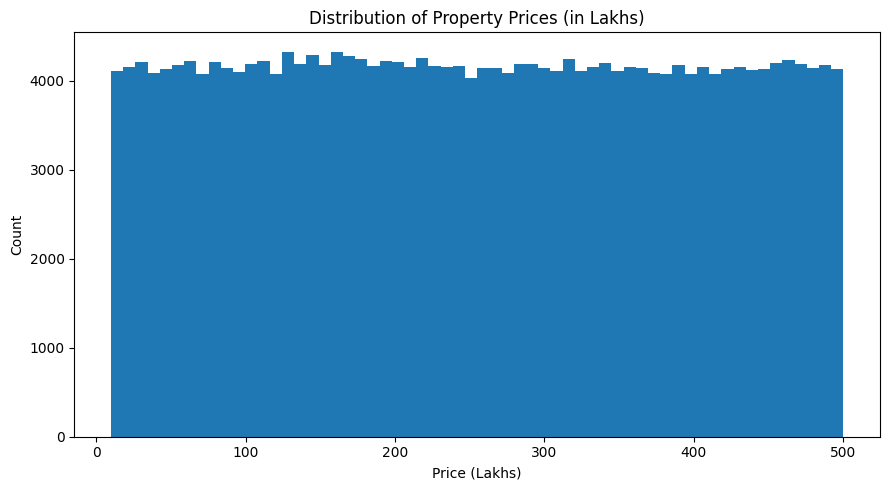

In [8]:
#1.what is the distribution of property prices?
price = data['Price_in_Lakhs']
price_stats = price.describe()
print(price_stats)

plt.figure(figsize=(9,5))
plt.hist(price, bins=60)
plt.title('Distribution of Property Prices (in Lakhs)')
plt.xlabel('Price (Lakhs)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()
plt.close()


count    250000.000000
mean       2749.813216
std        1300.606954
min         500.000000
25%        1623.000000
50%        2747.000000
75%        3874.000000
max        5000.000000
Name: Size_in_SqFt, dtype: float64


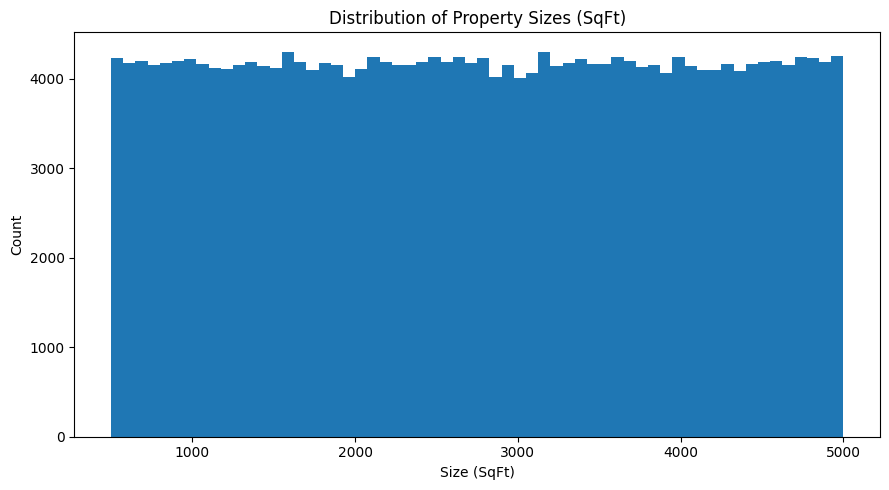

In [9]:
#2.What is the distribution of property sizes?
size = data['Size_in_SqFt']
size_stats = size.describe()
print(size_stats)

plt.figure(figsize=(9,5))
plt.hist(size, bins=60)
plt.title('Distribution of Property Sizes (SqFt)')
plt.xlabel('Size (SqFt)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()
plt.close()

                   count  median      mean
Property_Type                             
Apartment          82956    0.09  0.130493
Independent House  83300    0.09  0.131023
Villa              83744    0.09  0.130276


C:\Users\Admin\AppData\Local\Temp\ipykernel_12620\1485239932.py:11: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_for_box, labels=top_by_count, vert=False, showfliers=False)


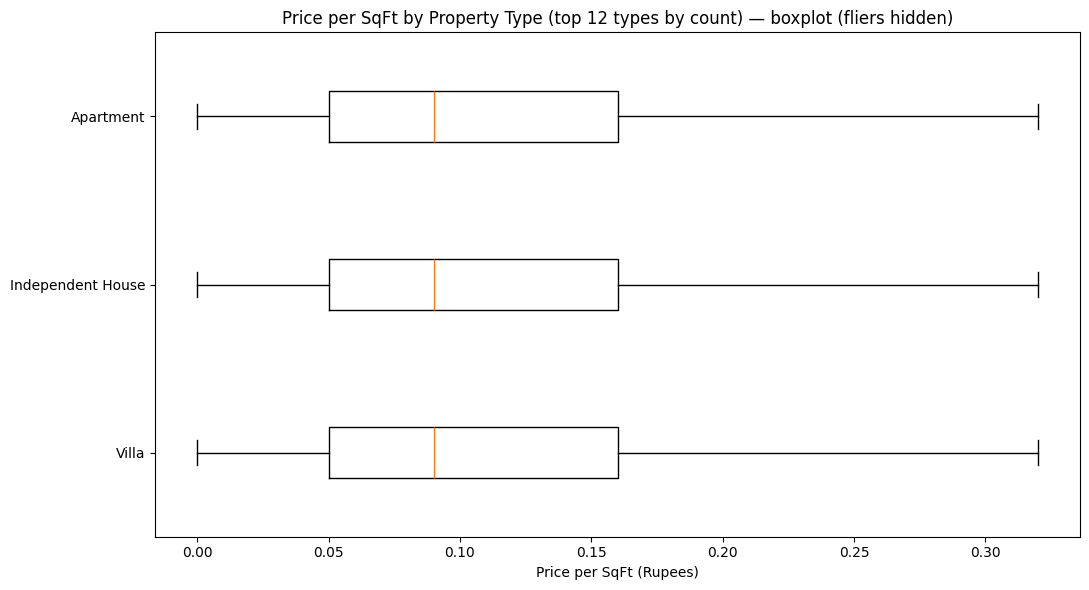

In [10]:
#3.How does price per sq ft vary by property type?
grp = data.groupby('Property_Type')['Price_per_SqFt'].agg(['count','median','mean']).sort_values('median', ascending=False)
print(grp.head(20))

# Plot: top 12 types by number of listings
top_by_count = data['Property_Type'].value_counts().head(12).index.tolist()
subset = data[data['Property_Type'].isin(top_by_count)]
data_for_box = [ subset[subset['Property_Type']==t]['Price_per_SqFt'].dropna().values for t in top_by_count ]

plt.figure(figsize=(11,6))
plt.boxplot(data_for_box, labels=top_by_count, vert=False, showfliers=False)
plt.title('Price per SqFt by Property Type (top 12 types by count) — boxplot (fliers hidden)')
plt.xlabel('Price per SqFt (Rupees)')
plt.tight_layout()
plt.show()
plt.close()

Correlation between Size and Price: -0.0025285467925389073


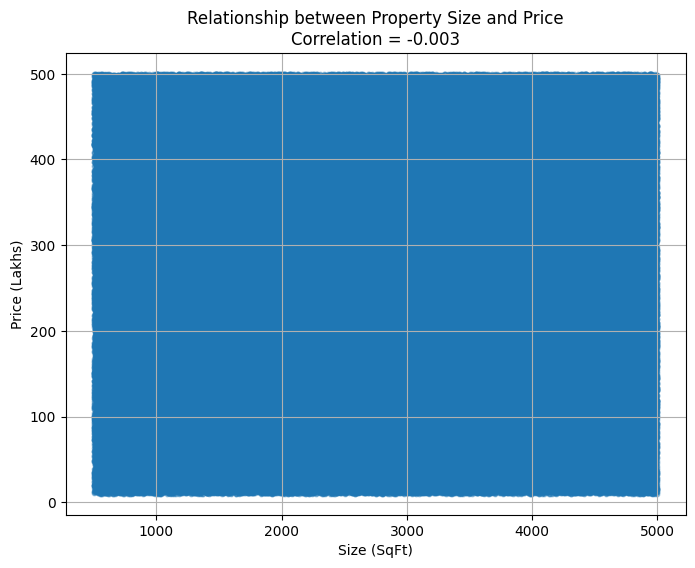

In [11]:
#4.Is there a relationship between property size and price?
corr = data['Price_in_Lakhs'].corr(data['Size_in_SqFt'])
print("Correlation between Size and Price:", corr)
plt.figure(figsize=(8,6))
plt.scatter(data['Size_in_SqFt'], data['Price_in_Lakhs'], alpha=0.4, s=10)
plt.title(f"Relationship between Property Size and Price\nCorrelation = {corr:.3f}")
plt.xlabel("Size (SqFt)")
plt.ylabel("Price (Lakhs)")
plt.grid(True)
plt.show()

20020


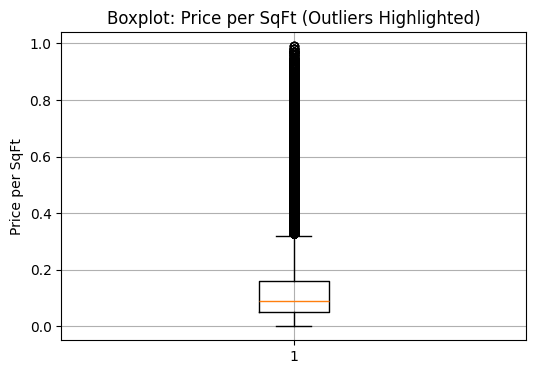

Outliers in Size_in_SqFt: 0


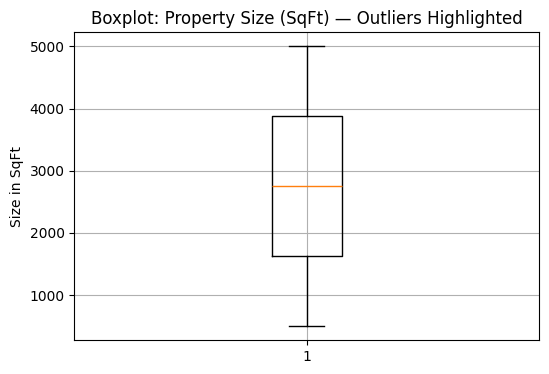

In [12]:
#5.Are there any outliers in price per sq ft or property size?
pp = data['Price_per_SqFt']
q1 = pp.quantile(0.25)
q3 = pp.quantile(0.75)
iqr = q3 - q1
lower_pp = q1 - 1.5 * iqr
upper_pp = q3 + 1.5 * iqr

outliers_pp = data[(pp < lower_pp) | (pp > upper_pp)]
print(len(outliers_pp))

# Boxplot
plt.figure(figsize=(6,4))
plt.boxplot(pp, vert=True)
plt.title("Boxplot: Price per SqFt (Outliers Highlighted)")
plt.ylabel("Price per SqFt")
plt.grid(True)
plt.show()

# ---------- Outliers for Size_in_SqFt ----------
sz = data['Size_in_SqFt']
q1s = sz.quantile(0.25)
q3s = sz.quantile(0.75)
iqrs = q3s - q1s
lower_sz = q1s - 1.5 * iqrs
upper_sz = q3s + 1.5 * iqrs

outliers_sz = data[(sz < lower_sz) | (sz > upper_sz)]
print("Outliers in Size_in_SqFt:", len(outliers_sz))

# Boxplot
plt.figure(figsize=(6,4))
plt.boxplot(sz, vert=True)
plt.title("Boxplot: Property Size (SqFt) — Outliers Highlighted")
plt.ylabel("Size in SqFt")
plt.grid(True)
plt.show()

In [13]:
data.head()

,ID,State,City,Locality,Property_Type,BHK,Size_in_SqFt,Price_in_Lakhs,Price_per_SqFt,Year_Built,...,Age_of_Property,Nearby_Schools,Nearby_Hospitals,Public_Transport_Accessibility,Parking_Space,Security,Amenities,Facing,Owner_Type,Availability_Status
0,1,Tamil Nadu,Chennai,Locality_84,Apartment,1,4740,489.76,0.10,1990,...,35,10,3,High,No,No,"Playground, Gym, Garden, Pool, Clubhouse",West,Owner,Ready_to_Move
1,2,Maharashtra,Pune,Locality_490,Independent House,3,2364,195.52,0.08,2008,...,17,8,1,Low,No,Yes,"Playground, Clubhouse, Pool, Gym, Garden",North,Builder,Under_Construction
2,3,Punjab,Ludhiana,Locality_167,Apartment,2,3642,183.79,0.05,1997,...,28,9,8,Low,Yes,No,"Clubhouse, Pool, Playground, Gym",South,Broker,Ready_to_Move
3,4,Rajasthan,Jodhpur,Locality_393,Independent House,2,2741,300.29,0.11,1991,...,34,5,7,High,Yes,Yes,"Playground, Clubhouse, Gym, Pool, Garden",North,Builder,Ready_to_Move
4,5,Rajasthan,Jaipur,Locality_466,Villa,4,4823,182.90,0.04,2002,...,23,4,9,Low,No,Yes,"Playground, Garden, Gym, Pool, Clubhouse",East,Builder,Ready_to_Move


State
Andhra Pradesh    0.132037
Assam             0.130819
Bihar             0.130513
Chhattisgarh      0.130243
Delhi             0.129477
Gujarat           0.130995
Haryana           0.130692
Jharkhand         0.129754
Karnataka         0.132538
Kerala            0.129849
Madhya Pradesh    0.130717
Maharashtra       0.130703
Odisha            0.130322
Punjab            0.129311
Rajasthan         0.129336
Tamil Nadu        0.131367
Telangana         0.130957
Uttar Pradesh     0.131417
Uttarakhand       0.130245
West Bengal       0.130645
Name: Price_per_SqFt, dtype: float64


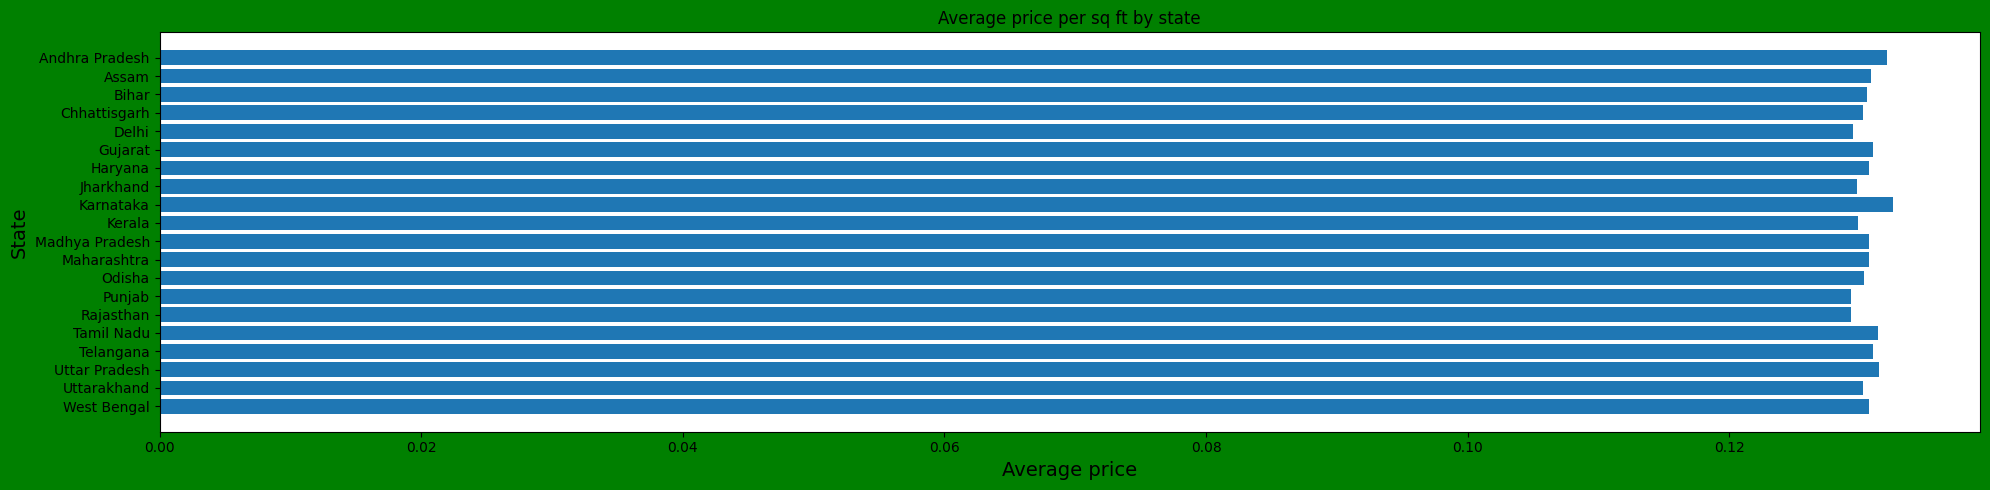

In [14]:
#6.What is the average price per sq ft by state?
avg_price = data.groupby(["State"])["Price_per_SqFt"].mean()
print(avg_price)
plt.figure(figsize=(20,5),facecolor="green")
plt.barh(avg_price.index.astype(str),avg_price.values)
plt.gca().invert_yaxis()
plt.xlabel("Average price", size=14)
plt.ylabel("State", size=14)
plt.title("Average price per sq ft by state")
plt.tight_layout()
plt.show()

City
Bangalore     258.456639
Surat         258.080467
Kochi         257.415221
Gaya          257.053391
Mangalore     256.920925
Dehradun      256.890115
Mysore        256.848172
Chennai       256.830172
Hyderabad     256.594051
Coimbatore    256.504745
Name: Price_in_Lakhs, dtype: float64


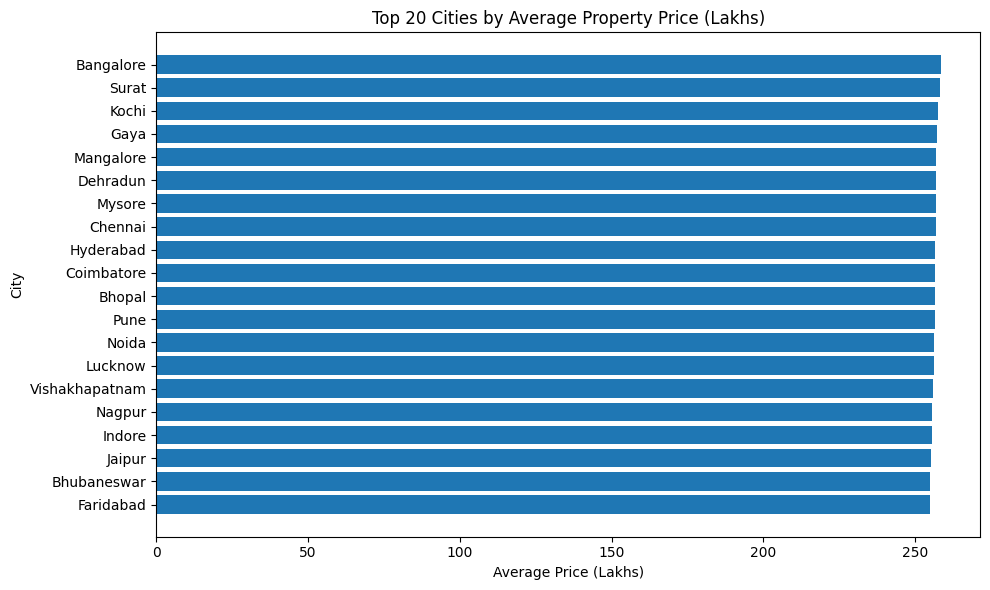

In [15]:
#7.What is the average property price by city?
avg_price_by_city = data.groupby('City')['Price_in_Lakhs'].mean().sort_values(ascending=False)
print(avg_price_by_city.head(10))
top20 = avg_price_by_city.head(20)
plt.figure(figsize=(10,6))
plt.barh(top20.index, top20.values)
plt.title("Top 20 Cities by Average Property Price (Lakhs)")
plt.xlabel("Average Price (Lakhs)")
plt.ylabel("City")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

Locality
Locality_443    16.0
Locality_54     17.0
Locality_454    17.0
Locality_56     17.0
Locality_46     17.0
Locality_468    17.0
Locality_480    17.0
Locality_458    17.0
Locality_348    17.0
Locality_171    17.0
Name: Age_of_Property, dtype: float64


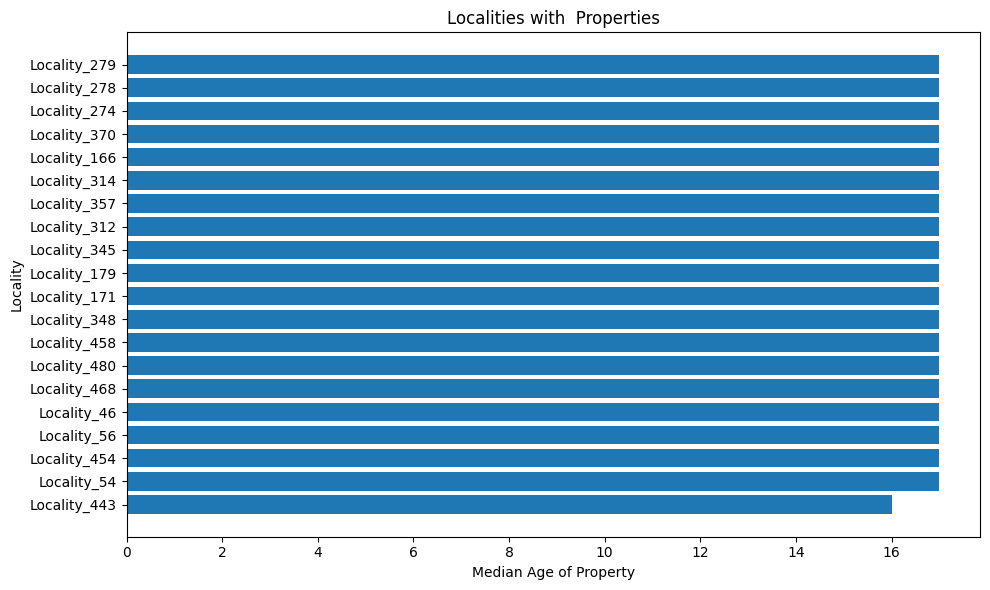

In [16]:
#8.What is the median age of properties by locality?
median_age_by_locality = data.groupby('Locality')['Age_of_Property'].median().sort_values()
print(median_age_by_locality.head(10))
top20_young = median_age_by_locality.head(20)
plt.figure(figsize=(10,6))
plt.barh(top20_young.index, top20_young.values)
plt.title("Localities with  Properties")
plt.xlabel("Median Age of Property")
plt.ylabel("Locality")
plt.tight_layout()
plt.show()

BHK             1     2     3     4     5
City                                     
Ahmedabad    1264  1267  1272  1258  1350
Amritsar     1284  1239  1234  1224  1240
Bangalore     839   823   802   833   847
Bhopal       1238  1235  1255  1259  1297
Bhubaneswar  1236  1293  1299  1217  1278


<Figure size 1200x600 with 0 Axes>

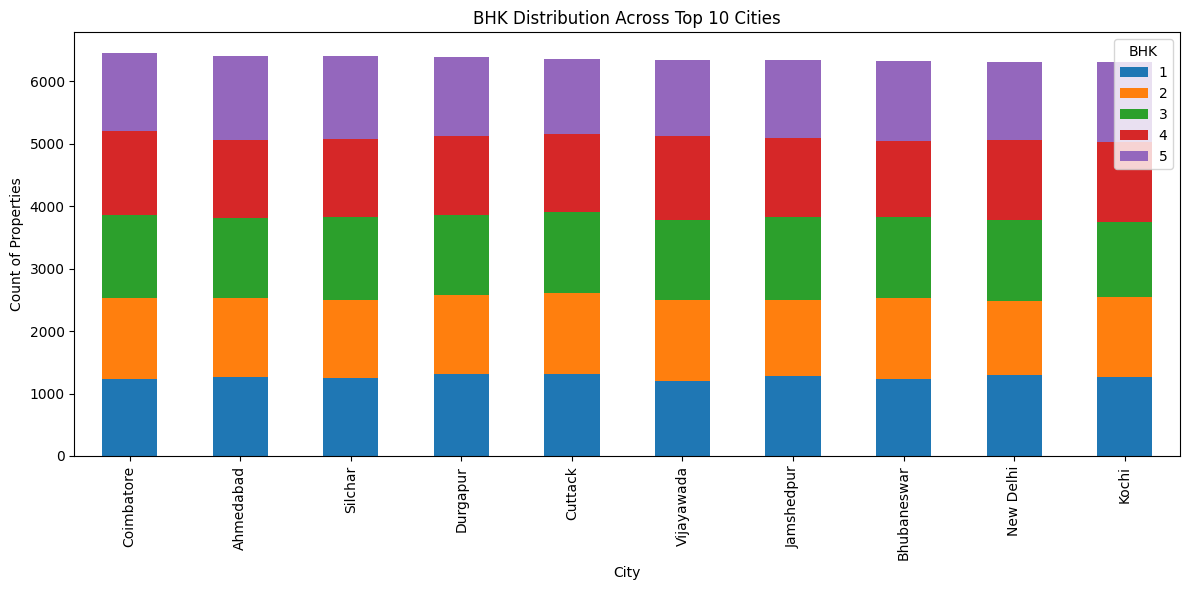

In [17]:
#9.How is BHK distributed across cities?
bhk_city = data.groupby(['City', 'BHK']).size().unstack(fill_value=0)
print(bhk_city.head())
top10_cities = data['City'].value_counts().head(10).index
bhk_top10 = bhk_city.loc[top10_cities]
plt.figure(figsize=(12,6))
bhk_top10.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title("BHK Distribution Across Top 10 Cities")
plt.xlabel("City")
plt.ylabel("Count of Properties")
plt.tight_layout()
plt.show()

Locality
Locality_395    282.680
Locality_366    282.330
Locality_303    282.270
Locality_79     280.760
Locality_203    280.325
Name: Price_in_Lakhs, dtype: float64


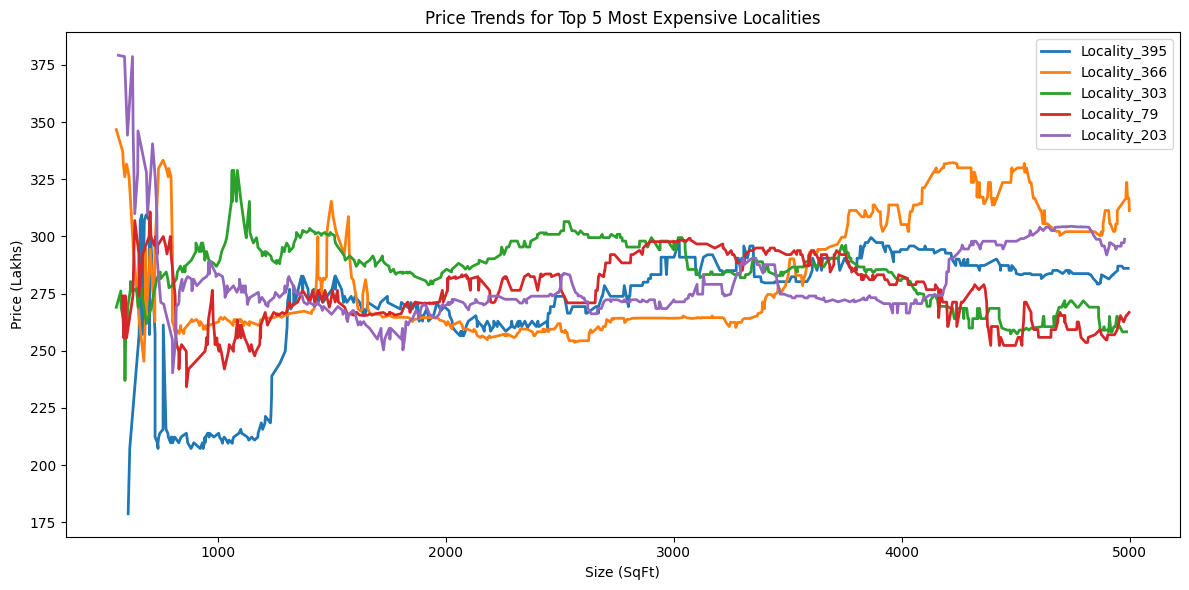

In [18]:
#10.What are the price trends for the top 5 most expensive localities
top5_localities = data.groupby('Locality')['Price_in_Lakhs'].median().sort_values(ascending=False).head(5)
print(top5_localities)
top5 = top5_localities.index
# Step 2 — Plot price trend for each locality
plt.figure(figsize=(12,6))
for loc in top5:
    subset = data[data['Locality'] == loc].sort_values('Size_in_SqFt')
    
    # Rolling median smooths the line
    rolling = subset['Price_in_Lakhs'].rolling(window=200, min_periods=10).median()
    
    plt.plot(subset['Size_in_SqFt'], rolling, label=loc, linewidth=2)

plt.title("Price Trends for Top 5 Most Expensive Localities")
plt.xlabel("Size (SqFt)")
plt.ylabel("Price (Lakhs)")
plt.legend()
plt.tight_layout()
plt.show()

                        ID       BHK  Size_in_SqFt  Price_in_Lakhs  \
ID                1.000000 -0.001718     -0.002293       -0.001636   
BHK              -0.001718  1.000000     -0.001033       -0.000980   
Size_in_SqFt     -0.002293 -0.001033      1.000000       -0.002529   
Price_in_Lakhs   -0.001636 -0.000980     -0.002529        1.000000   
Price_per_SqFt   -0.001344  0.001174     -0.614533        0.555625   
Year_Built        0.002734  0.000917      0.004135        0.002714   
Floor_No         -0.000214  0.001263     -0.002775       -0.001719   
Total_Floors      0.003382 -0.002862     -0.003451        0.001283   
Age_of_Property  -0.002734 -0.000917     -0.004135       -0.002714   
Nearby_Schools   -0.001203 -0.000762      0.001966        0.000155   
Nearby_Hospitals  0.001429  0.001162     -0.001695       -0.002769   

                  Price_per_SqFt  Year_Built  Floor_No  Total_Floors  \
ID                     -0.001344    0.002734 -0.000214      0.003382   
BHK            

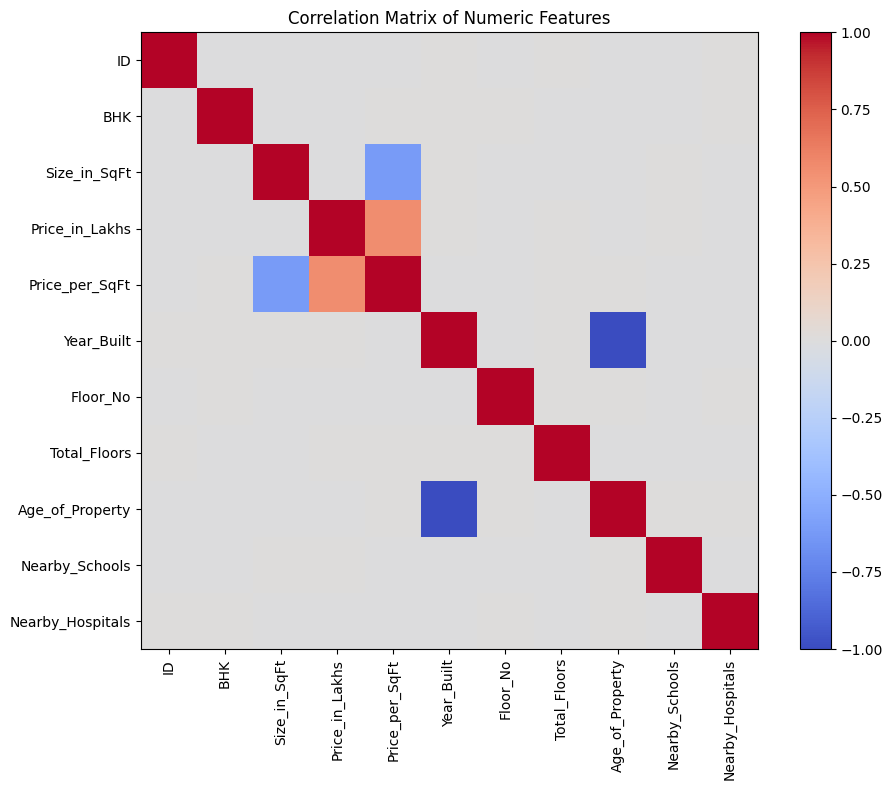

In [19]:
#11.How are numeric features correlated with each other?
numeric_cols = data.select_dtypes(include=[np.number]).columns
corr_matrix = data[numeric_cols].corr()
print(corr_matrix)
plt.figure(figsize=(10,8))
plt.imshow(corr_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(numeric_cols)), numeric_cols, rotation=90)
plt.yticks(range(len(numeric_cols)), numeric_cols)
plt.title("Correlation Matrix of Numeric Features")
plt.tight_layout()
plt.show()

Nearby_Schools
1     0.09
2     0.09
3     0.09
4     0.09
5     0.09
6     0.09
7     0.09
8     0.09
9     0.09
10    0.09
Name: Price_per_SqFt, dtype: float64


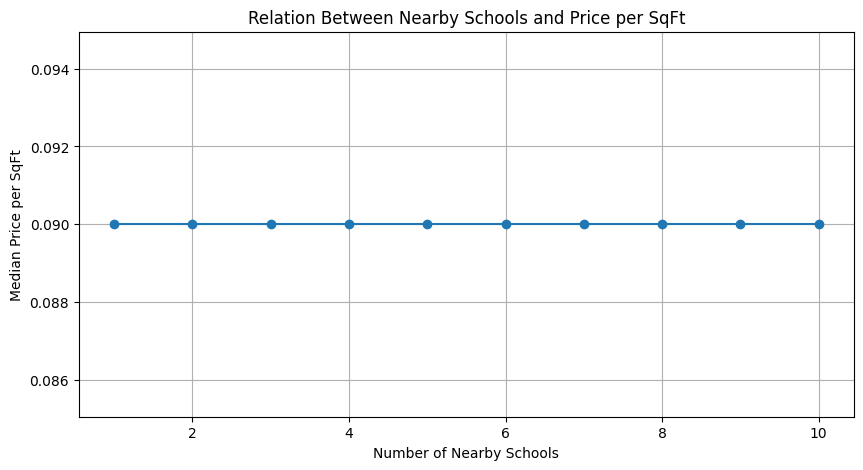

In [20]:
#12.How do nearby schools relate to price per sq ft?
grouped_schools = data.groupby('Nearby_Schools')['Price_per_SqFt'].median()
print(grouped_schools.head(15))
plt.figure(figsize=(10,5))
plt.plot(grouped_schools.index, grouped_schools.values, marker='o')
plt.title("Relation Between Nearby Schools and Price per SqFt")
plt.xlabel("Number of Nearby Schools")
plt.ylabel("Median Price per SqFt")
plt.grid(True)
plt.show()

Nearby_Hospitals
1     0.09
2     0.09
3     0.09
4     0.09
5     0.09
6     0.09
7     0.09
8     0.09
9     0.09
10    0.09
Name: Price_per_SqFt, dtype: float64


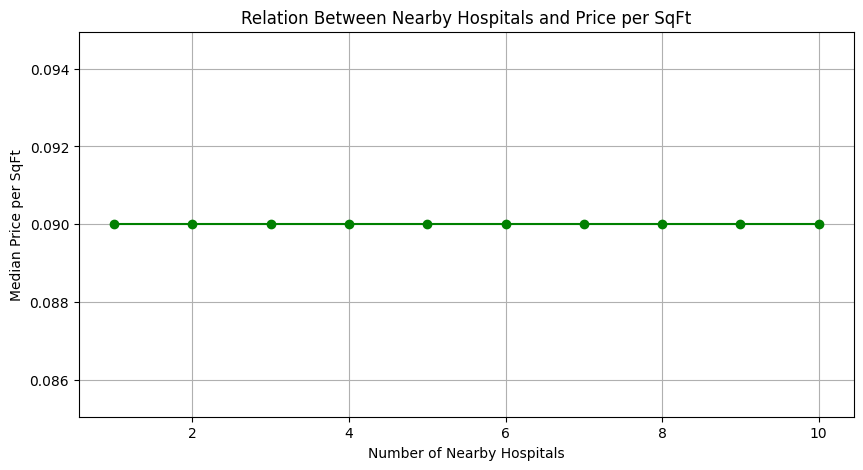

In [21]:
#13.How do nearby hospitals relate to price per sq ft?
grouped_hospital = data.groupby('Nearby_Hospitals')['Price_per_SqFt'].median()
print(grouped_hospital.head(15))
plt.figure(figsize=(10,5))
plt.plot(grouped_hospital.index, grouped_hospital.values, marker='o', color='green')
plt.title("Relation Between Nearby Hospitals and Price per SqFt")
plt.xlabel("Number of Nearby Hospitals")
plt.ylabel("Median Price per SqFt")
plt.grid(True)
plt.show()



Furnished_Status
Furnished         253.555
Semi-furnished    253.810
Unfurnished       254.190
Name: Price_in_Lakhs, dtype: float64


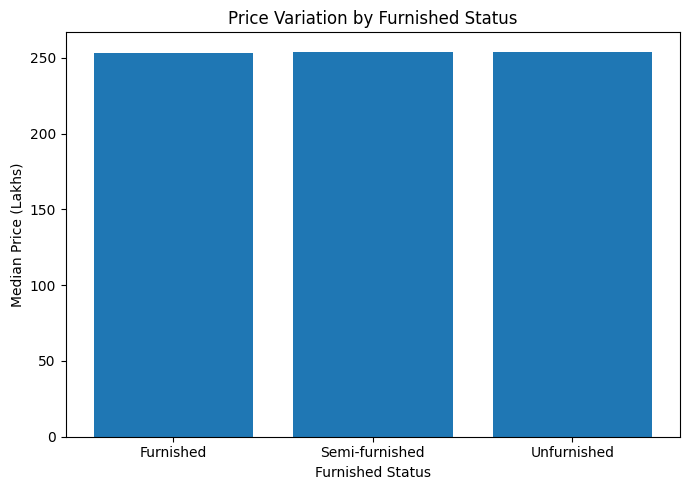

In [22]:
#14.How does price vary by furnished status?
grouped_furnished = data.groupby('Furnished_Status')['Price_in_Lakhs'].median()
print(grouped_furnished)
plt.figure(figsize=(7,5))
plt.bar(grouped_furnished.index, grouped_furnished.values)
plt.title("Price Variation by Furnished Status")
plt.xlabel("Furnished Status")
plt.ylabel("Median Price (Lakhs)")
plt.tight_layout()
plt.show()

Facing
East     253.50
North    253.86
South    253.18
West     255.03
Name: Price_in_Lakhs, dtype: float64


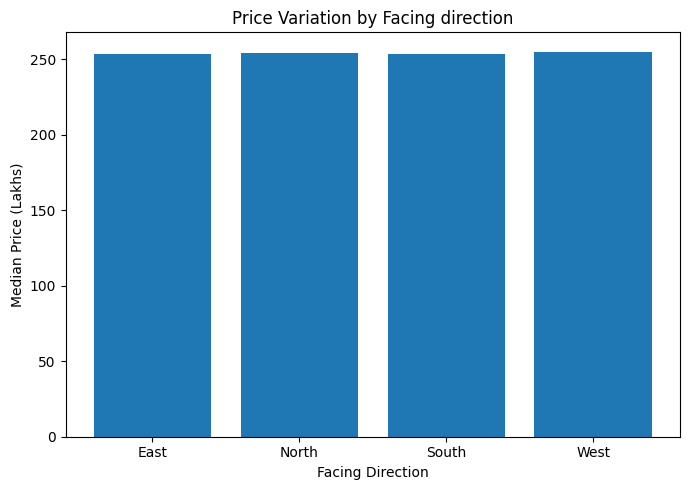

In [23]:
#15.How does price per sq ft vary by property facing direction?
group_facing= data.groupby("Facing")["Price_in_Lakhs"].median()
print(group_facing)
plt.figure(figsize=(7,5))
plt.bar(group_facing.index, group_facing.values)
plt.title("Price Variation by Facing direction")
plt.xlabel("Facing Direction")
plt.ylabel("Median Price (Lakhs)")
plt.tight_layout()
plt.show()


Owner_Type
Broker     83479
Owner      83268
Builder    83253
Name: count, dtype: int64


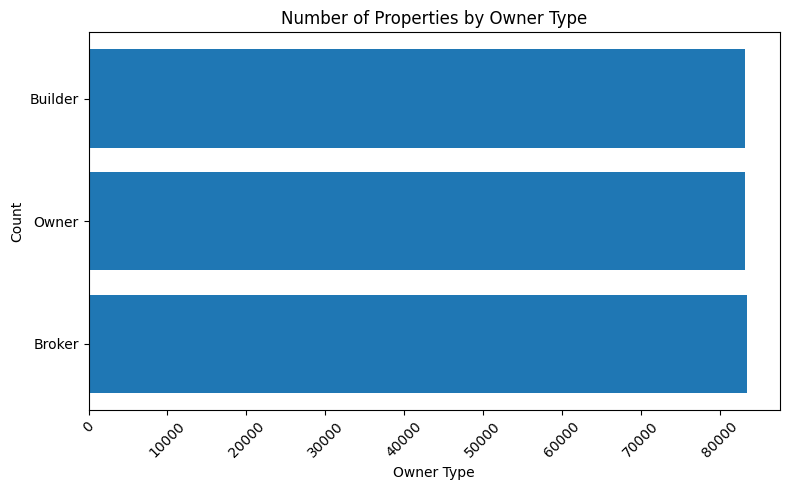

In [24]:
#16.How many properties belong to each owner type?
owner_counts = data['Owner_Type'].value_counts()
print(owner_counts)
plt.figure(figsize=(8,5))
plt.barh(owner_counts.index, owner_counts.values)
plt.title("Number of Properties by Owner Type")
plt.xlabel("Owner Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Availability_Status
Under_Construction    125035
Ready_to_Move         124965
Name: count, dtype: int64


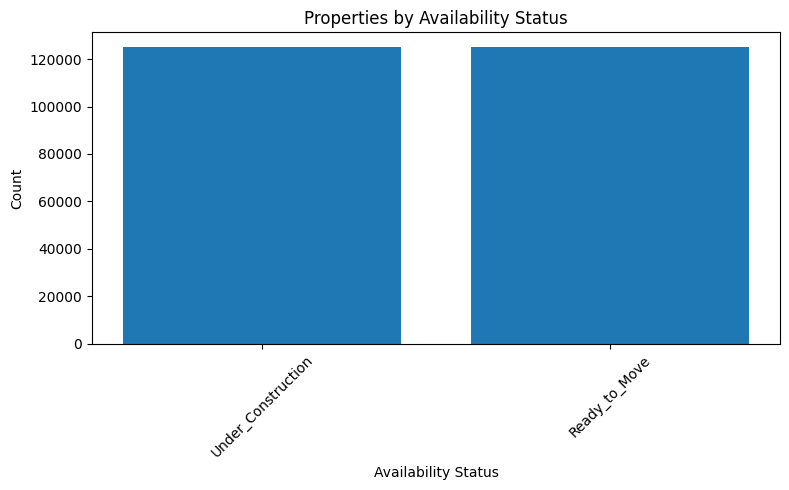

In [25]:
#17.How many properties are available under each availability status?
availability_counts = data['Availability_Status'].value_counts()
print(availability_counts)
plt.figure(figsize=(8,5))
plt.bar(availability_counts.index, availability_counts.values)
plt.title("Properties by Availability Status")
plt.xlabel("Availability Status")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Parking_Space
No     253.37
Yes    254.36
Name: Price_in_Lakhs, dtype: float64


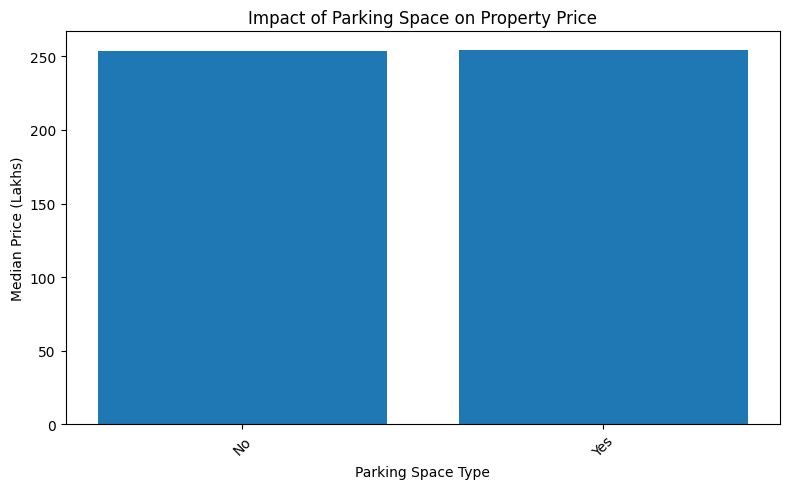

In [26]:
#18.Does parking space affect property price?
parking_price = data.groupby('Parking_Space')['Price_in_Lakhs'].median()
print(parking_price)
plt.figure(figsize=(8,5))
plt.bar(parking_price.index, parking_price.values)
plt.title("Impact of Parking Space on Property Price")
plt.xlabel("Parking Space Type")
plt.ylabel("Median Price (Lakhs)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Amenity_Count
1    0.09
2    0.09
3    0.09
4    0.09
5    0.09
Name: Price_per_SqFt, dtype: float64


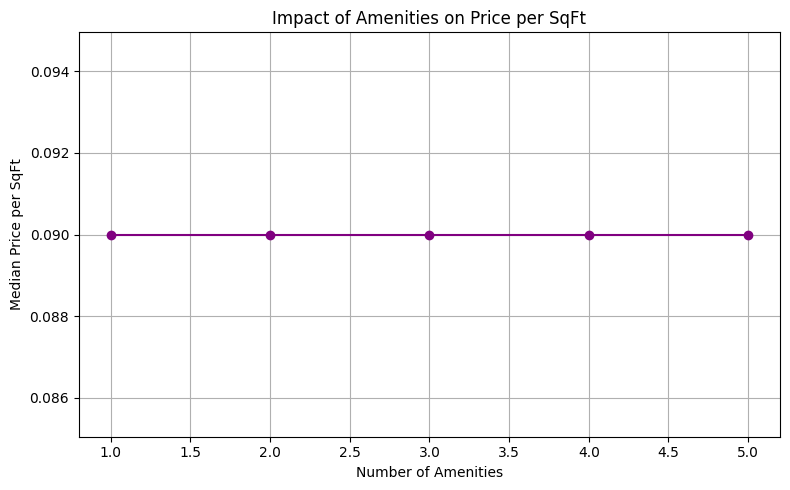

In [27]:
#19.How do amenities affect price per sq ft?
def amenity_count(x):
    if isinstance(x, str):
        x = x.replace('|', ',')
        return len([a.strip() for a in x.split(',') if a.strip() != ''])
    return 0

data['Amenity_Count'] = data['Amenities'].apply(amenity_count)

amenity_ppsqft = data.groupby('Amenity_Count')['Price_per_SqFt'].median()
print(amenity_ppsqft)
plt.figure(figsize=(8,5))
plt.plot(amenity_ppsqft.index, amenity_ppsqft.values, marker='o', color='purple')
plt.title("Impact of Amenities on Price per SqFt")
plt.xlabel("Number of Amenities")
plt.ylabel("Median Price per SqFt")
plt.grid(True)
plt.tight_layout()
plt.show()

In [47]:
data

,ID,State,City,Locality,Property_Type,BHK,Size_in_SqFt,Price_in_Lakhs,Price_per_SqFt,Year_Built,...,Parking_Space,Security,Amenities,Facing,Owner_Type,Availability_Status,Amenity_Count,growth_rate_city,Future_Price_5Y,Good_Investment
0,1,Tamil Nadu,Chennai,Locality_84,Apartment,1,4740,489.76,0.10,1990,...,No,No,"Playground, Gym, Garden, Pool, Clubhouse",West,Owner,Ready_to_Move,5,0.08,719.618119,0
1,2,Maharashtra,Pune,Locality_490,Independent House,3,2364,195.52,0.08,2008,...,No,Yes,"Playground, Clubhouse, Pool, Gym, Garden",North,Builder,Under_Construction,5,0.09,300.831756,1
2,3,Punjab,Ludhiana,Locality_167,Apartment,2,3642,183.79,0.05,1997,...,Yes,No,"Clubhouse, Pool, Playground, Gym",South,Broker,Ready_to_Move,4,0.08,270.047807,1
3,4,Rajasthan,Jodhpur,Locality_393,Independent House,2,2741,300.29,0.11,1991,...,Yes,Yes,"Playground, Clubhouse, Gym, Pool, Garden",North,Builder,Ready_to_Move,5,0.08,441.224528,1
4,5,Rajasthan,Jaipur,Locality_466,Villa,4,4823,182.90,0.04,2002,...,No,Yes,"Playground, Garden, Gym, Pool, Clubhouse",East,Builder,Ready_to_Move,5,0.08,268.740105,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,249996,Gujarat,Ahmedabad,Locality_187,Independent House,5,1995,274.75,0.14,1995,...,No,No,"Playground, Garden, Gym, Clubhouse, Pool",East,Broker,Under_Construction,5,0.08,403.697889,0
249996,249997,Tamil Nadu,Chennai,Locality_348,Apartment,1,2293,13.40,0.01,2013,...,No,No,Playground,South,Broker,Ready_to_Move,1,0.08,19.688996,1
249997,249998,Telangana,Warangal,Locality_225,Villa,4,2910,236.94,0.08,2003,...,Yes,Yes,Playground,South,Builder,Under_Construction,1,0.08,348.142595,1
249998,249999,Odisha,Cuttack,Locality_138,Villa,1,1149,141.66,0.12,2007,...,Yes,Yes,"Playground, Gym, Pool",South,Owner,Ready_to_Move,3,0.08,208.145015,0


Public_Transport_Accessibility
High      0.09
Low       0.09
Medium    0.09
Name: Price_per_SqFt, dtype: float64


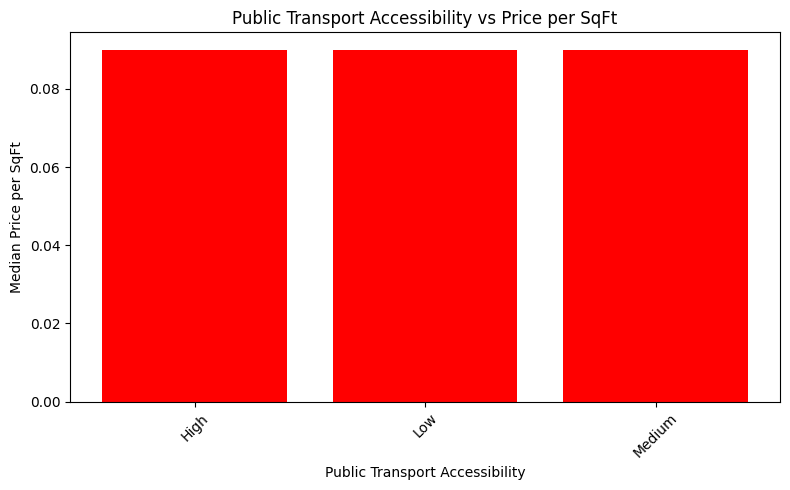

In [28]:
#20.How does public transport accessibility relate to price per sq ft or investment potential?
transport_ppsqft = data.groupby('Public_Transport_Accessibility')['Price_per_SqFt'].median()
print(transport_ppsqft)
plt.figure(figsize=(8,5))
plt.bar(transport_ppsqft.index, transport_ppsqft.values, color='red')
plt.title("Public Transport Accessibility vs Price per SqFt")
plt.xlabel("Public Transport Accessibility")
plt.ylabel("Median Price per SqFt")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [29]:
if "Future_Price_5Y" not in data.columns:

    if "City" in data.columns:
        city_growth = {
            "Bangalore": 0.10,
            "Hyderabad": 0.12,
            "Chennai": 0.08,
            "Pune": 0.09,
            "Mumbai": 0.07,
            "Delhi": 0.06
        }

        data["growth_rate_city"] = data["City"].map(city_growth).fillna(0.08)
        data["Future_Price_5Y"] = data["Price_in_Lakhs"] * (1 + data["growth_rate_city"]) ** 5

    else:
        data["Future_Price_5Y"] = data["Price_in_Lakhs"] * (1 + 0.08) ** 5

In [30]:
if "Good_Investment" not in data.columns:
    median_ppf = data["Price_per_SqFt"].median()
    rule_ppf = (data["Price_per_SqFt"] <= median_ppf).astype(int)
    score = 0
    if "BHK" in data.columns:
        score += (data["BHK"] >= 3).astype(int)

    if "Owner_Type" in data.columns:
        score += (data["Owner_Type"].astype(str).str.lower() == "builder").astype(int)

    if "Availability_Status" in data.columns:
        score += (data["Availability_Status"].astype(str).str.lower() == "ready_to_move").astype(int)

    data["Good_Investment"] = ((rule_ppf == 1) | (score >= 2)).astype(int)


In [51]:
data.to_csv("target_indian_house_price.csv")

In [31]:
drop_cols = ["ID", "growth_rate_city", "Price_in_Lakhs"] 
features = [c for c in data.columns if c not in drop_cols + ["Future_Price_5Y", "Good_Investment"]]

numeric_cols = data[features].select_dtypes(include=[np.number]).columns.tolist()
cat_cols = data[features].select_dtypes(include=['object', 'category', 'bool']).columns.tolist()

print("Numeric:", numeric_cols)
print("Categorical:", cat_cols)

Numeric: ['BHK', 'Size_in_SqFt', 'Price_per_SqFt', 'Year_Built', 'Floor_No', 'Total_Floors', 'Age_of_Property', 'Nearby_Schools', 'Nearby_Hospitals', 'Amenity_Count']
Categorical: ['State', 'City', 'Locality', 'Property_Type', 'Furnished_Status', 'Public_Transport_Accessibility', 'Parking_Space', 'Security', 'Amenities', 'Facing', 'Owner_Type', 'Availability_Status']


In [32]:
X = data[features]
y_reg = data["Future_Price_5Y"]
y_clf = data["Good_Investment"]
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y_reg, test_size=0.2, random_state=42)
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X, y_clf, test_size=0.2, random_state=42)

In [33]:
numeric_transformer = Pipeline([("scaler", StandardScaler())])
categorical_transformer = Pipeline([("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=True))])
preprocessor = ColumnTransformer(transformers=[("num", numeric_transformer, numeric_cols),("cat", categorical_transformer, cat_cols) ])


In [34]:
reg_models = {
    "LinearRegression": LinearRegression(),
    "RandomForestRegressor": RandomForestRegressor(n_estimators=50, max_depth=12, n_jobs=-1,random_state=42),
    "GradientBoostingRegressor": GradientBoostingRegressor(random_state=42)
}

if XGBRegressor:
    reg_models["XGBRegressor"] = XGBRegressor(n_estimators=50, n_jobs=-1, tree_method="hist",random_state=42)

if CatBoostRegressor:
    reg_models["CatBoostRegressor"] = CatBoostRegressor(iterations=100, verbose=0, thread_count=-1,random_state=42)

    
clf_models = {
    "LogisticRegression": LogisticRegression(max_iter=1000, n_jobs=1),
    "RandomForestClassifier": RandomForestClassifier(n_estimators=50, max_depth=12, n_jobs=-1,random_state=42)
}

if XGBClassifier:
    clf_models["XGBClassifier"] = XGBClassifier(n_estimators=50, n_jobs=-1, tree_method="hist", use_label_encoder=False, eval_metric="logloss")

if CatBoostClassifier:
    clf_models["CatBoostClassifier"] = CatBoostClassifier(iterations=100, verbose=0, thread_count=-1)

In [53]:
print("Train distribution:")
print(y_train_clf.value_counts(), y_train_clf.value_counts(normalize=True))
print("Test distribution:")
print(y_test_clf.value_counts(), y_test_clf.value_counts(normalize=True))


Train distribution:
Good_Investment
1    148192
0     51808
Name: count, dtype: int64 Good_Investment
1    0.74096
0    0.25904
Name: proportion, dtype: float64
Test distribution:
Good_Investment
1    36950
0    13050
Name: count, dtype: int64 Good_Investment
1    0.739
0    0.261
Name: proportion, dtype: float64


In [35]:
from math import sqrt


reg_results = []
clf_results = []

for name, model in reg_models.items():
    pipe = Pipeline([("preprocessor", preprocessor), ("model", model)])

    with mlflow.start_run(run_name=f"reg_{name}"):
        pipe.fit(X_train_reg, y_train_reg)
        preds = pipe.predict(X_test_reg)

        mse = mean_squared_error(y_test_reg, preds)
        rmse = sqrt(mse)
        mae = mean_absolute_error(y_test_reg, preds)
        r2 = r2_score(y_test_reg, preds)

        mlflow.log_metrics({"rmse": rmse, "mae": mae, "r2": r2})
        mlflow.sklearn.log_model(pipe, name)

        reg_results.append([name, rmse, mae, r2])
        print(name, rmse, mae, r2)

for name, model in clf_models.items():
    pipe = Pipeline([("preprocessor", preprocessor), ("model", model)])

    with mlflow.start_run(run_name=f"clf_{name}"):
        pipe.fit(X_train_clf, y_train_clf)
        preds = pipe.predict(X_test_clf)
        try:
            proba = pipe.predict_proba(X_test_clf)[:, 1]
        except:
            proba = np.zeros(len(preds))

        acc = accuracy_score(y_test_clf, preds)
        prec = precision_score(y_test_clf, preds)
        rec = recall_score(y_test_clf, preds)
        auc = roc_auc_score(y_test_clf, proba)

        mlflow.log_metrics({"accuracy": acc, "precision": prec, "recall": rec, "auc": auc})
        mlflow.sklearn.log_model(pipe, name)

        clf_results.append([name, acc, prec, rec, auc])
        print(name, acc, prec, rec, auc)

# Save results
reg_df = pd.DataFrame(reg_results, columns=["Model", "RMSE", "MAE", "R2"])
clf_df = pd.DataFrame(clf_results, columns=["Model", "Accuracy", "Precision", "Recall", "AUC"])

reg_df.to_csv("regression_results.csv", index=False)
clf_df.to_csv("classification_results.csv", index=False)

print("Saved evaluation results!")

c:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\mlflow\tracking\_tracking_service\utils.py:140: FutureWarning: Filesystem tracking backend (e.g., './mlruns') is deprecated. Please switch to a database backend (e.g., 'sqlite:///mlflow.db'). For feedback, see: https://github.com/mlflow/mlflow/issues/18534
  return FileStore(store_uri, store_uri)
2025/11/25 22:16:30 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/25 22:16:59 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


LinearRegression 149.59659072659935 120.244672698938 0.490073598838203


2025/11/25 22:25:01 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/25 22:29:48 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


RandomForestRegressor 14.88551409015208 11.480919979910958 0.9949511579776537


2025/11/25 22:30:43 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/25 22:30:48 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


GradientBoostingRegressor 23.51833902682488 18.442648351873423 0.9873968995181542


2025/11/25 22:30:50 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/25 22:30:55 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


XGBRegressor 14.352155648199673 11.524612432517474 0.9953064831989143


2025/11/25 22:30:57 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/25 22:31:01 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


LogisticRegression 0.82228 0.8569938431791584 0.911637347767253 0.9007838074647836


2025/11/25 22:31:06 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/25 22:31:10 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


RandomForestClassifier 0.88452 0.864853478138751 1.0 0.9999995852321922


c:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:199: UserWarning: [22:31:11] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
2025/11/25 22:31:12 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/25 22:31:16 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


XGBClassifier 1.0 1.0 1.0 1.0
Saved evaluation results!


In [ ]:
from mlflow.tracking import MlflowClient
client = MlflowClient()  

# Helper to find run_id for a run_name pattern
def find_run_id_by_name_prefix(prefix):
    # search runs in the default experiment (or specify experiment_id)
    runs = client.search_runs(experiment_ids=["0"], filter_string=f"tags.mlflow.runName LIKE '{prefix}%'",
                              run_view_type=1, max_results=100)  # adjust experiment_ids if not 0
    if runs:
        # return the most recent
        runs_sorted = sorted(runs, key=lambda r: r.info.start_time, reverse=True)
        return runs_sorted[0].info.run_id
    return None

# --- Register best regression model ---
# reg_df has columns ["Model", "RMSE", "MAE", "R2"] ; pick the top (lowest RMSE)
best_reg = reg_df.sort_values("RMSE").iloc[0]
best_reg_name = best_reg["Model"]            # e.g. "XGBRegressor"
print("Best regressor:", best_reg_name)

# We logged the model artifact under artifact_path = name when training:
# model_uri for that run is: "runs:/<run_id>/<artifact_path>"
# If you used mlflow.sklearn.log_model(pipe, name), artifact_path=name
# So we need the run_id of that run. We can search runs by run name prefix "reg_<Model>"
reg_prefix = f"reg_{best_reg_name}"
run_id_reg = find_run_id_by_name_prefix(reg_prefix)
if run_id_reg is None:
    print("Could not find run for", reg_prefix)
else:
    model_uri = f"runs:/{run_id_reg}/{best_reg_name}"
    registered_name = "Best_Regression"   # change as you like
    mv = mlflow.register_model(model_uri, registered_name)
    print(f"Registered regression model: {registered_name}, version: {mv.version}")

# --- Register best classifier model ---
best_clf = clf_df.sort_values("AUC", ascending=False).iloc[0]
best_clf_name = best_clf["Model"]
print("Best classifier:", best_clf_name)

clf_prefix = f"clf_{best_clf_name}"
run_id_clf = find_run_id_by_name_prefix(clf_prefix)
if run_id_clf is None:
    print("Could not find run for", clf_prefix)
else:
    model_uri_clf = f"runs:/{run_id_clf}/{best_clf_name}"
    registered_clf_name = "Best_Classifier"  # change as you like
    mv_clf = mlflow.register_model(model_uri_clf, registered_clf_name)
    print(f"Registered classifier model: {registered_clf_name}, version: {mv_clf.version}")

Best regressor: XGBRegressor


c:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\mlflow\tracking\_model_registry\utils.py:215: FutureWarning: Filesystem model registry backend (e.g., './mlruns') is deprecated. Please switch to a database backend (e.g., 'sqlite:///mlflow.db'). For feedback, see: https://github.com/mlflow/mlflow/issues/18534
  return FileStore(store_uri)
Registered model 'Best_Regression' already exists. Creating a new version of this model...
2025/11/25 22:31:19 WARNING mlflow.tracking._model_registry.fluent: Run with id a4b573ee23894e62a8439aa13f212ae0 has no artifacts at artifact path 'XGBRegressor', registering model based on models:/m-5627a23f2b8b43caa0dc9266ede22b5f instead
Created version '2' of model 'Best_Regression'.
Registered model 'Best_Classifier' already exists. Creating a new version of this model...
2025/11/25 22:31:19 WARNING mlflow.tracking._model_registry.fluent: Run with id 43e060deda6946a5b0f8472bd6c0864e has no artifacts at artifact path 'XGBClassifier', r

Registered regression model: Best_Regression, version: 2
Best classifier: XGBClassifier
Registered classifier model: Best_Classifier, version: 2


Created version '2' of model 'Best_Classifier'.


In [38]:
client.transition_model_version_stage(
    name="Best_Regression",
    version=mv.version,             # version returned from register_model
    stage="Production",
    archive_existing_versions=True  # optional: archive other prod versions
)

# promote classifier
client.transition_model_version_stage(
    name="Best_Classifier",
    version=mv_clf.version,
    stage="Production",
    archive_existing_versions=True
)

C:\Users\Admin\AppData\Local\Temp\ipykernel_12620\494060148.py:1: FutureWarning: ``mlflow.tracking.client.MlflowClient.transition_model_version_stage`` is deprecated since 2.9.0. Model registry stages will be removed in a future major release. To learn more about the deprecation of model registry stages, see our migration guide here: https://mlflow.org/docs/latest/model-registry.html#migrating-from-stages
  client.transition_model_version_stage(
C:\Users\Admin\AppData\Local\Temp\ipykernel_12620\494060148.py:9: FutureWarning: ``mlflow.tracking.client.MlflowClient.transition_model_version_stage`` is deprecated since 2.9.0. Model registry stages will be removed in a future major release. To learn more about the deprecation of model registry stages, see our migration guide here: https://mlflow.org/docs/latest/model-registry.html#migrating-from-stages
  client.transition_model_version_stage(


<ModelVersion: aliases=[], creation_timestamp=1764090079294, current_stage='Production', deployment_job_state=None, description=None, last_updated_timestamp=1764090293306, metrics=[<Metric: dataset_digest=None, dataset_name=None, key='accuracy', model_id='m-0a9c8335ff1046178f802248def4cb6b', run_id='43e060deda6946a5b0f8472bd6c0864e', step=0, timestamp=1764090072584, value=1.0>,
 <Metric: dataset_digest=None, dataset_name=None, key='auc', model_id='m-0a9c8335ff1046178f802248def4cb6b', run_id='43e060deda6946a5b0f8472bd6c0864e', step=0, timestamp=1764090072584, value=1.0>,
 <Metric: dataset_digest=None, dataset_name=None, key='precision', model_id='m-0a9c8335ff1046178f802248def4cb6b', run_id='43e060deda6946a5b0f8472bd6c0864e', step=0, timestamp=1764090072584, value=1.0>,
 <Metric: dataset_digest=None, dataset_name=None, key='recall', model_id='m-0a9c8335ff1046178f802248def4cb6b', run_id='43e060deda6946a5b0f8472bd6c0864e', step=0, timestamp=1764090072584, value=1.0>], model_id='m-0a9c8335f

In [44]:
from mlflow.tracking import MlflowClient
client = MlflowClient()

# list versions for registry names
print("Regression versions:", client.get_latest_versions("Best_Regression", stages=["Production", "Staging", "None"]))
print("Classifier versions:", client.get_latest_versions("Best_Classifier", stages=["Production", "Staging", "None"]))


Regression versions: [<ModelVersion: aliases=[], creation_timestamp=1763963085735, current_stage='None', deployment_job_state=None, description=None, last_updated_timestamp=1763963085735, metrics=[<Metric: dataset_digest=None, dataset_name=None, key='mae', model_id='m-45828a2b49094c29b4d811ab6c3276f7', run_id='0aeb471b61884d02b67a58d5b8f138a5', step=0, timestamp=1763715439813, value=11.524612432517474>,
 <Metric: dataset_digest=None, dataset_name=None, key='r2', model_id='m-45828a2b49094c29b4d811ab6c3276f7', run_id='0aeb471b61884d02b67a58d5b8f138a5', step=0, timestamp=1763715439813, value=0.9953064831989143>,
 <Metric: dataset_digest=None, dataset_name=None, key='rmse', model_id='m-45828a2b49094c29b4d811ab6c3276f7', run_id='0aeb471b61884d02b67a58d5b8f138a5', step=0, timestamp=1763715439813, value=14.352155648199673>], model_id='m-45828a2b49094c29b4d811ab6c3276f7', name='Best_Regression', params={}, run_id='0aeb471b61884d02b67a58d5b8f138a5', run_link=None, source='models:/m-45828a2b4909

C:\Users\Admin\AppData\Local\Temp\ipykernel_12620\2944990935.py:5: FutureWarning: ``mlflow.tracking.client.MlflowClient.get_latest_versions`` is deprecated since 2.9.0. Model registry stages will be removed in a future major release. To learn more about the deprecation of model registry stages, see our migration guide here: https://mlflow.org/docs/latest/model-registry.html#migrating-from-stages
  print("Regression versions:", client.get_latest_versions("Best_Regression", stages=["Production", "Staging", "None"]))
C:\Users\Admin\AppData\Local\Temp\ipykernel_12620\2944990935.py:6: FutureWarning: ``mlflow.tracking.client.MlflowClient.get_latest_versions`` is deprecated since 2.9.0. Model registry stages will be removed in a future major release. To learn more about the deprecation of model registry stages, see our migration guide here: https://mlflow.org/docs/latest/model-registry.html#migrating-from-stages
  print("Classifier versions:", client.get_latest_versions("Best_Classifier", sta

In [48]:
import mlflow.pyfunc
import pandas as pd

# load production versions
reg = mlflow.pyfunc.load_model("models:/Best_Regression/Production")
clf = mlflow.pyfunc.load_model("models:/Best_Classifier/Production")

# take a sample row from your data (or craft one)
df = pd.read_csv("india_housing_prices.csv")
sample = data.head(1).drop(columns=["Future_Price_5Y","Good_Investment"], errors="ignore")

print("Sample row:\n", sample.T)

# predict
print("Regression predict ->", reg.predict(sample))
print("Classifier predict ->", clf.predict(sample))
if hasattr(clf, "predict_proba"):
    print("Classifier proba ->", clf.predict_proba(sample))


Sample row:
                                                                        0
ID                                                                     1
State                                                         Tamil Nadu
City                                                             Chennai
Locality                                                     Locality_84
Property_Type                                                  Apartment
BHK                                                                    1
Size_in_SqFt                                                        4740
Price_in_Lakhs                                                    489.76
Price_per_SqFt                                                       0.1
Year_Built                                                          1990
Furnished_Status                                               Furnished
Floor_No                                                              22
Total_Floors                          

In [52]:
from mlflow.tracking import MlflowClient
import mlflow, traceback, os

print("MLflow tracking URI:", mlflow.get_tracking_uri())

# client and registry info
client = MlflowClient()
try:
    regs = client.list_registered_models()
    print("Registered models (first 20):", [m.name for m in regs][:20])
except Exception as e:
    print("Could not list registered models:", e)

# Show latest versions for Best_Classifier (if exists)
try:
    vers = client.get_latest_versions("Best_Classifier", stages=["Production","Staging","None"])
    print("Best_Classifier latest versions:", [(v.version, v.current_stage) for v in vers])
except Exception as e:
    print("Could not get versions for Best_Classifier:", e)

# Try to load the registry model (sklearn loader) and show full trace if fails
try:
    print("Attempting mlflow.sklearn.load_model('models:/Best_Classifier/Production') ...")
    clf = mlflow.sklearn.load_model("models:/Best_Classifier/Production")
    print("Loaded classifier from registry (Production). Type:", type(clf))
    # quick check
    print("Has predict_proba?:", hasattr(clf, "predict_proba"))
except Exception as e:
    print("Loading from registry failed. Full traceback:")
    traceback.print_exc()

# Fallback: list mlruns artifacts to find the classifier artifact path
try:
    mlruns_root = mlflow.get_tracking_uri().replace("file:","") if mlflow.get_tracking_uri().startswith("file:") else "mlruns"
    print("Looking under:", mlruns_root)
    # list a few artifact paths
    import glob
    candidates = glob.glob(os.path.join(mlruns_root, "*", "*", "artifacts", "*"))
    print("Found artifact folders (first 20):", candidates[:20])
    # try loading the most recent candidate
    if candidates:
        cand = sorted(candidates, key=os.path.getmtime, reverse=True)[0]
        print("Trying to load candidate artifact:", cand)
        try:
            clf2 = mlflow.sklearn.load_model(cand)
            print("Loaded classifier from artifact path. Type:", type(clf2))
            print("Has predict_proba?:", hasattr(clf2, "predict_proba"))
        except Exception:
            print("Failed to load candidate artifact. Trace:")
            traceback.print_exc()
except Exception as e:
    print("Artifact scan failed:", e)


MLflow tracking URI: file:///f:/python%20Proj/Projects/RealEstateInvestmentAdvisor/mlruns
Could not list registered models: 'MlflowClient' object has no attribute 'list_registered_models'


C:\Users\Admin\AppData\Local\Temp\ipykernel_12620\3272265373.py:16: FutureWarning: ``mlflow.tracking.client.MlflowClient.get_latest_versions`` is deprecated since 2.9.0. Model registry stages will be removed in a future major release. To learn more about the deprecation of model registry stages, see our migration guide here: https://mlflow.org/docs/latest/model-registry.html#migrating-from-stages
  vers = client.get_latest_versions("Best_Classifier", stages=["Production","Staging","None"])


Best_Classifier latest versions: [(1, 'None'), (2, 'Production')]
Attempting mlflow.sklearn.load_model('models:/Best_Classifier/Production') ...
Loaded classifier from registry (Production). Type: <class 'sklearn.pipeline.Pipeline'>
Has predict_proba?: True
Looking under: ///f:/python%20Proj/Projects/RealEstateInvestmentAdvisor/mlruns
Found artifact folders (first 20): []
